<a href="https://colab.research.google.com/github/aminsamir45/MIT-9.40-Neural-Computation/blob/main/PSET%207/pset7_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSET 7

**Due May 12, 2023**


<br>

---

Note: If you submit by May 13th, you will not be penalized for the late day.

#NAME:


#gmail:






---



---



---



# Learning Objectives and Goals


In this problem set, we will study simplified linear recurrent neural networks with a symmetric connectivity matrix. This exercise is not only an opportunity to understand their properties as dynamical systems but more importantly to illustrate general principles that go beyond this specific case. The PSET will take you to explore these properties by doing analytical work and performing numerical simulations in Python. By the end of the problem set we will study the conditions under which these networks can act as neuronal integrators, and thus represent simplified models of how short-term memory arises in neuronal circuits.

.



.


This problem provides a great way to put all the linear algebra we have learned so far to work and relate those concepts back to ordinary linear differential equations that we studied during the first third of this course. By the end of this PSET, you should be able to:

• Decompose the network into eigenmodes.

• Compute gain factors and effective time constants.

• Predict the response of the network to different input vectors.

• Plot state-space trajectories for different input vectors.

• Implement these networks in Python and compute solutions numerically, by using the Euler integration scheme.

#Introduction

Many neural networks consist of 2 populations of neurons whose effective connectivity is such that they provide self-excitation to neurons in their own population and inhibit neurons in the other population. A simple case of these circuits occurs when the connections are symmetric as in the following diagram:



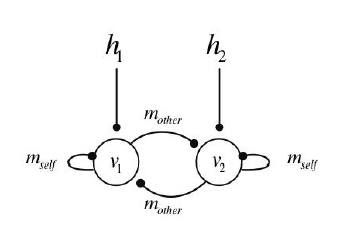

For simplicity, we will treat each of these populations as a single neuron. Here, $m_{self}$ 
gives the connection between each neuron and itself and $m_{other}$ gives the connection
between the different neurons. In this problem, we will find the eigenvalues and
eigenvectors of this circuit in terms of $m_{self}$ and $m_{other}$, and then apply our findings to understand specific cases.

.



---



---



# PART 1: Decomposing the network into eigenmodes


The recurrent connectivity matrix $M$ of the above network is a special case of
symmetric matrices. The eigenvectors $\hat{f}_i$ of this matrix are the columns of a rotation
matrix $\Phi$ at 45 degrees counter clockwise:


$$\Phi (45^o) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix}$$

Note again the symmetry of the network and recall that the eigenvectors of $M$ are
patterns of inputs, with the remarkable property that the steady state outputs of the
network will be a scaled version of these same patterns. 

.

Remark: The hat notation is usually reserved for unit vectors. The eigenvectors are therefore assumed normalized.



.

More help on latex is given at the end of this file. If you choose not to use Latex, just upload an image of your work under each **answer**.

##1.1

Write down the equations describing this network. Assume that each of the
neurons has an intrinsic time constant $\tau_n$. This means that with no recurrent
connections, the activity of these neurons decays to zero with time constant $\tau_n$.

First, write separate equations for $dv_1/dt$ and $dv_2/dt$ . Then, using matrix notation,
write a single equation that describes the entire network in terms of the firing rate
vector $\mathbf{v} = (v_1,v_2)$, an input vector , and a recurrent connectivity matrix
$M$.



---





**ANSWER**
$$
\tau_n \frac{dv_1}{dt} = -v_1 + F[h_1 + v_1m_{self} + v_2m_{other}]
$$

$$
\tau_n \frac{dv_1}{dt} = -v_1 + F[h_1 + v_2m_{self} + v_1m_{other}]$$

$$ \tau_n \frac{d\mathbf{v}}{dt} = -\mathbf{v} + F[M\mathbf{v} + \mathbf{h}]$$

$$ \tau_n \frac{d\mathbf{v}}{dt} = -\mathbf{v} + M\mathbf{v} + \mathbf{h}$$


##1.2

Write expressions for eigenvalues $λ_1$ and $λ_2$ of the connectivity matrix as a function
of $m_{self}$ and $m_{other}$. Also, show that the eigenvalue-eigenvector equation 

$$M \hat{f}_i = \lambda_i \hat{f}_i$$

is satisfied for each eigenvector.



**ANSWER**
For eigenvalue 1:
$$ \lambda_1 = m_{self} + m_{other} $$

$$M\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = (m_{self} + m_{other})\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} $$

For eigenvalue 2:
$$ \lambda_1 = m_{self} - m_{other} $$

$$M\begin{bmatrix} \frac{-1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = (m_{self} - m_{other})\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} $$



Thus, it is holds that $M \hat{f}_i = \lambda_i \hat{f}_i$.

##1.3

Rewrite the input vector $\mathbf{h}$ as a linear combination of the eigenvectors

$$ \mathbf{h} = b_1 \hat{f}_1 + b_2\hat{f}_2 .$$

Show that the coefficient $b_1$ is

$$b_1= h_{common} ,$$

 where $h_{common} = \frac{\sqrt{2}}{2}(h_1 + h_2)$.

 .

Also, show that $b_2=h_{diff}$ , where $h_{diff} = \frac{\sqrt{2}}{2}(h_2 - h_1)$.


<br>


Verify that the two solutions can be in the matrix form:

$$\begin{bmatrix} b_1 \\ b_2 \end{bmatrix} = \Phi^T \begin{bmatrix} h_1 \\ h_2 \end{bmatrix}$$





**ANSWER**

We can see that 
$$ \mathbf{h} = b_1 \hat{f}_1 + b_2\hat{f}_2 $$

$$\mathbf{h} = \Phi \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$$

$$\Phi^T \mathbf{h} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$$

$$\Phi^T \begin{bmatrix} h_1 \\ h_2 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$$

$$\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix} \begin{bmatrix} h_1 \\ h_2 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$$

Thus, we can see that:

$$b_1 = \frac{\sqrt{2}}{2}(h_1+h_2) \text{ and } b_2 = \frac{\sqrt{2}}{2}(h_2- h_1) $$



---



#PART 2: Simple model of selective amplification of differences between inputs.


Suppose that each neuron excites itself by setting $m_{self} = 0.2$ and inhibits the other
neuron, $m_{other} = -0.7$. Furthermore, assume that this network receives the following
input vector, 
$$\mathbf{h} (t\ge 0)= (117,123) Hz.$$

Therefore, we have

$$h_1 = 117,$$
and
$$h_2 = 123.$$




##2.1

Calculate the eigenvalues of the network.


**ANSWER**

$$ M  = \begin{bmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \end{bmatrix}$$

$$ M  = \begin{bmatrix} 0.2 & -0.7 \\ -0.7 & 0.2 \end{bmatrix}$$

Solving eigenvalues by using the characteristic polynomial:

$$ 0  = \begin{bmatrix} 0.2 - \lambda & -0.7 \\ -0.7 & 0.2 - \lambda \end{bmatrix}$$

$$0  =  (0.2- \lambda)^2 - 0.49$$

$$ 0  = 0.04 -0.4\lambda + \lambda ^2 -0.49 $$

$$ 0  = \lambda^2 -0.4\lambda -0.45 $$


$$\lambda_1 = -0.5, \lambda_2 = 0.9 $$

Solving the eigenvectors:

$f_1$: 

$$ \begin{bmatrix} 0.2- (-0.5) & -0.7 \\ -0.7 & 0.2--(0.5) \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 0 $$

$$ \begin{bmatrix} 0.7 & -0.7 \\ -0.7 & 0.7 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 0 $$

$$ x_1 = x_2 $$

$$f_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$f_2$:
$$ \begin{bmatrix} 0.2-0.9 & -0.7 \\ -0.7 & 0.2-0.9 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 0 $$

$$ \begin{bmatrix} -0.7 & -0.7 \\ -0.7 & -0.7 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 0 $$

$$ x_1 = -x_2 $$

$$f_2 = \frac{1}{\sqrt{2}} \begin{bmatrix} -1 \\ 1 \end{bmatrix}$$



Our eigenvector matrix becomes:

$$ f = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix} $$


##2.2

What will happen to inputs that are common, i.e., $h_{common}$, to the two cells? (Will they be
amplified or attenuated?) Determine this by looking at the eigenvalue for the
appropriate eigenvector.


**ANSWER**

The transformation is attenauted because $h_common$ corresponds to the negative eigenvalue -0.5



##2.3


What will happen to inputs that are opposite, i.e., $h_{difference}$, for the two cells (amplified or
attenuated)?


**ANSWER**

The transformation is aplified. This is because $h_{difference}$ corresponds to the eigenvector $f_2$ which has apositive eigenvalue of 0.9.


##2.4

Calculate the gain factors $1/(1−\lambda )$ for each mode (eigenvector) of the network, using
the values found above.


**ANSWER**

Gain for $f_1$:

$$ g = \frac{1}{1-\lambda_2} $$

$$ g = \frac{1}{1-(-0.5)} $$

$$g = \frac{2}{3} $$



Gain for $f_2$:

$$ g = \frac{1}{1-\lambda_1} $$

$$ g = \frac{1}{1-0.9} $$

$$g = 10 $$

##2.5


If each cell in the network has an intrinsic time constant $\tau_n = 18 ms$, what will be
the corresponding time constants $\tau_{eff}$ for each mode? Does the amplified mode
change more, or less rapidly, than the attenuated mode?


**ANSWER**


Here is the equation for the effective time constant: 

$$ \tau_{eff} = \frac{\tau_n}{1-\lambda}  $$

Thus, $\tau_{eff}$ corresponds to the following:
First mode:

$$ \tau_{eff} = \frac{18}{1-(-0.5)} = 12ms  $$

Second mode:

$$ \tau_{eff} = \frac{18}{1-0.9} = 180ms  $$

From this information, we can tell that the inputs along the direction of the first mode (amplified) change more slowly compared to the inputs along the direction of the second mode (attenuated ) which change more rapidly.

##2.6

Write the input vector in the form $$\mathbf{h} = b_1 \hat{f}_1 + b_2 \hat{f}_2 .$$

What are the values of the coefficients $b_1$ and
$b_2$?


**ANSWER**

Looking back at problem 1.3, we can use the equations $b_1= h_{common} $ and $b_2=h_{diff}$ which correspond to the eigenvectors.

$$ b_1 = \frac{117 + 123}{\sqrt{2}}  = \frac{240}{\sqrt{2}}$$

and 

$$b_2 = \frac{123 - 117}{\sqrt{2}} = \frac{6}{\sqrt{2}}$$

Putting these equations together, we get:

$$ \mathbf{h} = \frac{240}{\sqrt{2}}(\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}) + \frac{6}{\sqrt{2}}(\frac{1}{\sqrt{2}} \begin{bmatrix} -1 \\ 1 \end{bmatrix})$$


##2.7


For each mode write down a differential equation describing the response of mode
activity ($c_1$ and $c_2$) to an input vector $\mathbf{h}$.


**ANSWER**

Using the following equation:

$$ \tau_n \frac{d\mathbf{c}}{dt} = -\mathbf{c} + Λ\mathbf{c} + Φ^T\mathbf{h}$$

We get: 

$$ \tau_n \frac{d\mathbf{c_1}}{dt} = -\mathbf{c_1} + \lambda_1\mathbf{c_1} + \frac{h_1+h_2}{\sqrt{2}}$$

$$ \tau_n \frac{d\mathbf{c_2}}{dt} = -\mathbf{c_2} + \lambda_1\mathbf{c_2} + \frac{h_2-h_1}{\sqrt{2}}$$

##2.8


Find the steady state activity of the 2 neurons $\mathbf{v}_{\infty} = (v_{\infty,1}, v_{\infty,2})$.




**answer**
Using the following equation: 

$$ \mathbf{v_{∞}} = Φ(I - \Lambda)^{-1} Φ^T\mathbf{h} $$

We get:

$$\mathbf{v_{∞}} = \frac{1}{2}\begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix}\begin{bmatrix} \frac{2}{3} & 0 \\ 0 & 10 \end{bmatrix}\begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}\begin{bmatrix} 117 \\ 123 \end{bmatrix} $$

$$\mathbf{v_{∞}} =\begin{bmatrix} 50 \\ 110 \end{bmatrix} $$

Thus,$\mathbf{v_{∞_1}} = 50$ and $\mathbf{v_{∞_2}} = 110$.

##2.9


Plot the state-space trajectory of the firing rates $\mathbf{v} =(v_1,v_2)$ as they approach this
steady state value. Assume the network starts at zero firing rate, and that the input
is turned on at $t=0$. On the same set of axes, plot the eigenvectors $\hat{f}_1$ and $\hat{f_2}$ (not necessarily normalized).



.

To carry out this task, we will
simulate the network by numerically solving the equations with the **Euler method**,
which is simple to implement. Do **not** use exponential Euler, as
this is more difficult to implement. Set the initial condition to 

$$\mathbf{v} (t=0) = (0,0) ,$$

 and the
input vector to 

$$ \mathbf{h} (t\ge 0) = (117, 123) Hz.$$

 Integrate for 1 second using an integration
time-step of $10^{-4}$ seconds.

.

Have a look at **NumericalIntegration.pdf** (PSET 1) for a refresher on numerical integration.


**ANSWER**



.......










.......

The Euler method is implemented within a function: you'll need to complete the for-loop of this function. You can use either a component form or matrix form. 

$$\mathbf{v} = \Phi \mathbf{c}$$

Check the following cell before working on IntegrateEuler to better understand the role of the arguments $M, h,T,dt,tau$

In [ ]:
import numpy as np

# easier to solve in (f1,f2) basis. The (v1,v2) equations becomes decoupled in the (f1,f2) basis
def IntegrateEuler(M,h,T,dt,tau):
  b1 = (np.sqrt(2)/2)*(h[0]+h[1])
  b2 = (np.sqrt(2)/2)*(h[1]- h[0])
  m_self = M[0,0]
  m_other = M[0,1]
  lambda1 = m_self + m_other
  lambda2 = m_self - m_other
  N = int(T/dt)      # number of integration steps
  phi = np.array([[1, -1],[1, 1]])*(2**0.5 / 2)

  
  c1 = np.zeros(N)                 # initial conditions on both modes
  c2 = np.zeros(N)


  # NEED TO ADD YOUR CODE HERE ...... THE EQUATIONS FOR THE MODES c1 and c2 are
  # easier to implement. But you are free to implement it directly for v1 and v2:
  for n in range(N-1):
    c1[n+1] = (dt/tau)*(c1[n]*(lambda1-1)+(h[0]+h[1])/2**0.5)+c1[n]
    c2[n+1] = (dt/tau)*(c2[n]*(lambda2-1)+(h[1]-h[0])/2**0.5)+c2[n]

# Finally transform back to v1 and v2, the firing rates for each neuron: 
  V = phi@np.vstack((c1, c2))
  v1, v2 = V

  return v1,v2

1. Plot $v_2$ vs. $v_1$
2. plot directions along $\hat{f}_1$ and $\hat{f}_2$

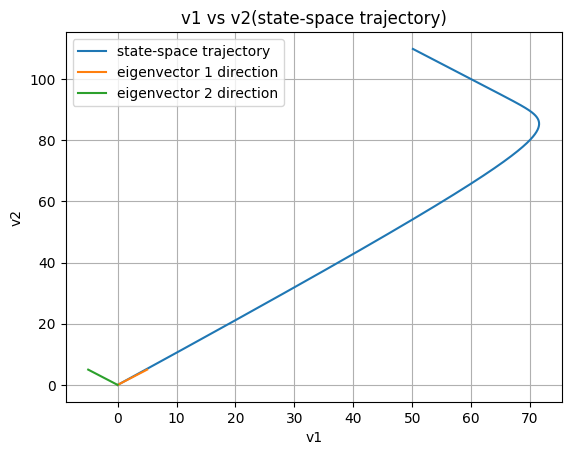

steady state v_infinity: 50.12  109.88


In [ ]:
import matplotlib.pyplot as plt

# plot the evolution of v
M = np.array([[0.2, -0.7],[-0.7, 0.2]])

dt = 0.1          # msec  time-step
tau = 18          # msec

T = 1000           # msec  total time
N = int(T/dt)

h = np.array([117, 123])

v1,v2 = IntegrateEuler(M,h,T,dt,tau)

fig, ax = plt.subplots()

# PLOT v2 vs v1  (label your plot)
ax.plot(v1, v2, label='state-space trajectory')
ax.set(title='v1 vs v2(state-space trajectory)', xlabel='v1', ylabel='v2')
ax.plot([0, 5], [0, 5], label='eigenvector 1 direction')
ax.plot([0, -5], [0, 5], label='eigenvector 2 direction')
ax.legend()
ax.grid()
plt.show()

# print steady state values for v1 and v2
print("steady state v_infinity: {:.2f}".format(v1[N-1])," {:.2f}".format(v2[N-1]))
























##2.10

Plot $v_1$ and $v_2$ as a function of *time* to confirm that your simulation works properly
by checking that you get the same steady state solution you found analytically.

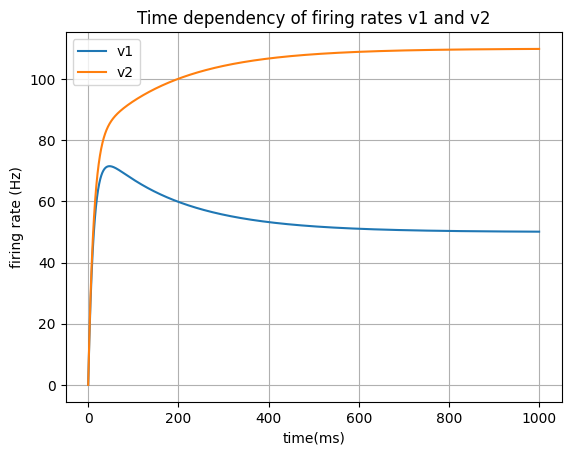

In [ ]:
time = dt*np.arange(N)   # time vector


# PLOT v1 vs time
# PLOT v2 vs. time
fig2, ax2 = plt.subplots()

ax2.plot(time, v1, label='v1')
ax2.plot(time, v2, label='v2')
ax2.set(title='Time dependency of firing rates v1 and v2', xlabel='time(ms)', ylabel='firing rate (Hz)')
ax2.legend()
ax2.grid()
plt.show()



---



#PART 3: Simple model of neuronal integration



##3.1

Modify the value of $m_{other}$ so that one of the **modes** of the network integrates a
quantity proportional to the input difference (i.e. $h_2 - h_1$).


<br>


Hint: Go back to 2.7 and check if any of the eigenmodes can be the result of integrating $h_2 - h_1$.



**ANSWER**

The eigenvalue needs to be 1 in order to be an integrating mode. we choose the second eigenvector, $f_1 =  \begin{bmatrix} -1 \\ 1 \end{bmatrix}$, which corresponds to $h_2 - h_1$ or $m_{self}-m_{other}$.

We know that $m_{self} = 2$. Thus, in order for the eigenvalue of $\lambda_2$ to be 1, $m_{other} = -0.8$.

##3.2


Demonstrate by numerical integration that you observe persistent activity even
after $h_1$ and $h_2$ are turned off. Do this by considering the following input vector:

$$\mathbf{h}(t) = 0 \,\, Hz, \,\,\,\,  t < 0  \,\,\,\, \text{and} \,\,\,  t \ge 0.8 s  $$
$$\mathbf{h}(t) = (117,123) \, Hz, \,\,\, 0 \le t < 0.8 s$$


Continue to use the Euler method with the previously specified initial condition,
simulation length and integration time-step.

.


To demonstrate persistent activity, make a figure with 2 panels. On the upper panel
plot $v_1$ and $v_2$ as a function of time. On the lower panel plot the modes activity ($c_1$
and $c_2$) as a function of time. Remember that $\mathbf{c} = \Phi^T \mathbf{v}$ (change of basis formula).


**ANSWER**

<br>



Hint: write a new function by modifying IntegrateEuler() which will now include additional arguments to take into account that $\mathbf{h}$ is now time-dependent.
<br>

The function np.logical() can be useful.



In [ ]:
# easier to solve in (f1,f2) basis
def IntegrateEuler2(M,h,T,dt,tau, Ton, Toff):
  m_self = M[0,0]
  m_other = M[0,1]
  lambda1 = m_self + m_other
  lambda2 = m_self - m_other
  N = int(T/dt)      # number of integration steps
  N_on = int(Ton/dt)
  N_off = int(Toff/dt)
  phi = np.array([[1, -1],[1, 1]])*(2**0.5 / 2)
  h1 = np.zeros(N)
  h2 = np.zeros(N)
  for i in range(N_on, N_off):
    h1[i] = h[0]
    h2[i] = h[1]

  
  # ADD YOUR CODE HERE. you'll need to define the input and a for -loop  
  for n in range(N-1): 
    c1[n+1] = (dt/tau)*(c1[n]*(lambda1-1)+(h1[n]+h2[n])/2**0.5)+c1[n]
    c2[n+1] = (dt/tau)*(c2[n]*(lambda2-1)+(h2[n]-h1[n])/2**0.5)+c2[n]

  V = phi@np.vstack((c1, c2))
  v1, v2 = V

  

  return v1,v2, c1, c2

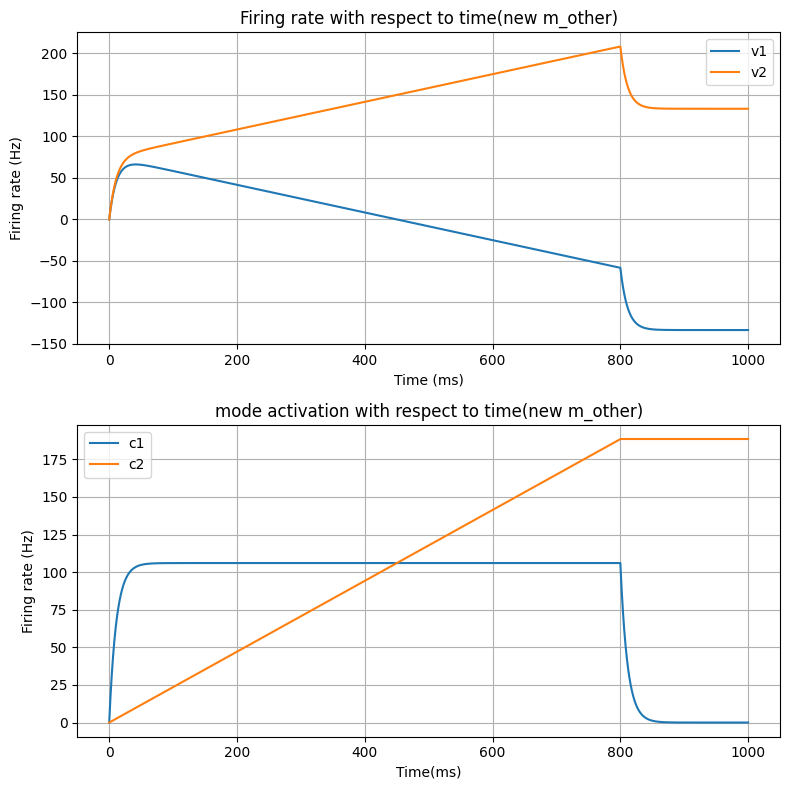

In [ ]:
M2 = np.array([[0.2, -0.8],[-0.8, 0.2]])
Ton = 0
Toff = 800
dt = 0.1   # msec
tau = 18
T = 1000           
h = np.array([117, 123])


time = dt*np.arange(N)

v1,v2,c1,c2 = IntegrateEuler2(M2,h,T,dt,tau, Ton, Toff)

fig,(ax1,ax2)=plt.subplots(2,1, figsize=(8,8))


# PLOT v1 vs time and v2 vs time in one subplot (labels )
ax1.plot(time, v1, label='v1')
ax1.plot(time, v2, label='v2')
ax1.set(ylabel='Firing rate (Hz)', xlabel='Time (ms)', title='Firing rate with respect to time(new m_other)')
ax1.legend()
ax1.grid()

# PLOT c1 and c2 vs time in a second subplot (labels)
ax2.plot(time, c1, label='c1')
ax2.plot(time, c2, label='c2')
ax2.set(ylabel='Firing rate (Hz)', xlabel='Time(ms)', title='mode activation with respect to time(new m_other)')
ax2.legend()
ax2.grid()
plt.tight_layout()

##3.3

Use numerical simulations and relevant plots to show that this behavior is different
from the network you simulated in part 2 questions 3 and 4.

<br>

Increase the time window to $T = 2 sec$.

Is there memory in this system?

**ANSWER**

....



....



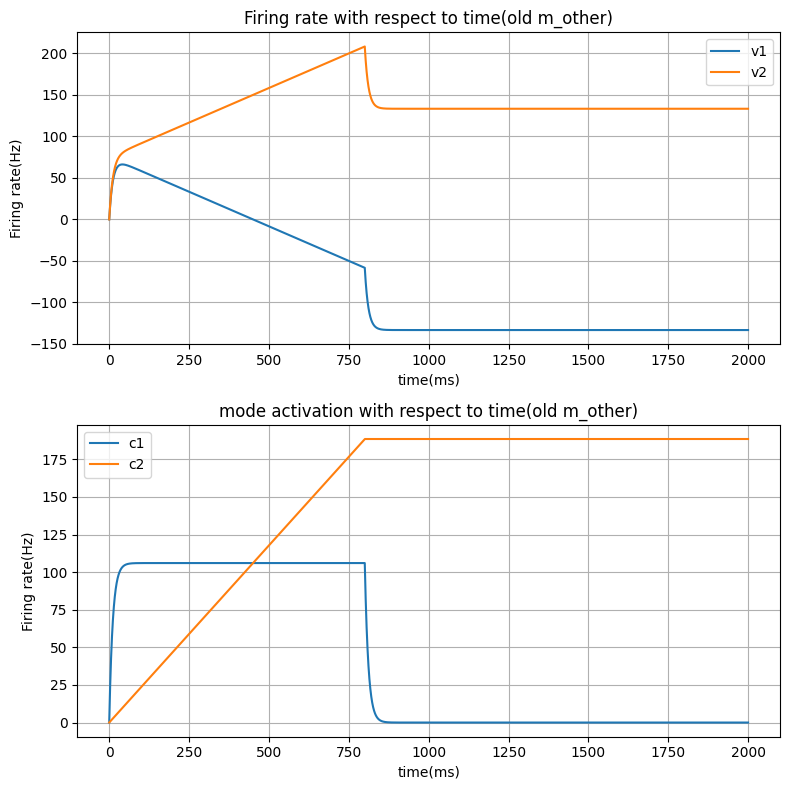

In [ ]:
T = 2000
h = np.array([117, 123])
M2 = np.array([[0.2, -0.8],[-0.8, 0.2]])
Ton = 0
Toff = 800
dt = 0.1   # msec
tau = 18
N = int(T/dt)

time = dt*np.arange(N)

v1,v2,c1,c2 = IntegrateEuler2(M2,h,T,dt,tau, Ton, Toff)

fig,(ax1,ax2)=plt.subplots(2,1, figsize=(8,8))
t = dt*np.arange(N)


#PLOT v1 vs time and v2 vs time in one subplot
ax1.plot(t, v1, label='v1')
ax1.plot(t, v2, label='v2')
ax1.set(ylabel='Firing rate(Hz)', xlabel='time(ms)', title='Firing rate with respect to time(old m_other)')
ax1.legend()
ax1.grid()



# PLOT c1 vs time and c2 vs time in one subplot
ax2.plot(t, c1, label='c1')
ax2.plot(t, c2, label='c2')
ax2.set(ylabel='Firing rate(Hz)', xlabel='time(ms)', title='mode activation with respect to time(old m_other)')
ax2.legend()
ax2.grid()
plt.tight_layout()
